In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Loading Data

In [3]:
df = pd.read_csv('bank-full.csv', sep=",")

In [4]:
df.shape

(45211, 18)

In [5]:
df.head()

,serNo,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [7]:
df.head()

,serNo,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


# 2. Data Analysis

In [8]:
list(df.columns)

['serNo',
 'age',
 'job',
 'marital',
 'education',
 'defaulter',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

#### - Conversion Rate

In [9]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)

In [10]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [11]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


#### - Conversion Rates by Marital Status

In [12]:
conversion_rate_by_marital = df.groupby(
    by='marital'
)['conversion'].sum() / df.groupby(
    by='marital'
)['conversion'].count() * 100.0

In [13]:
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

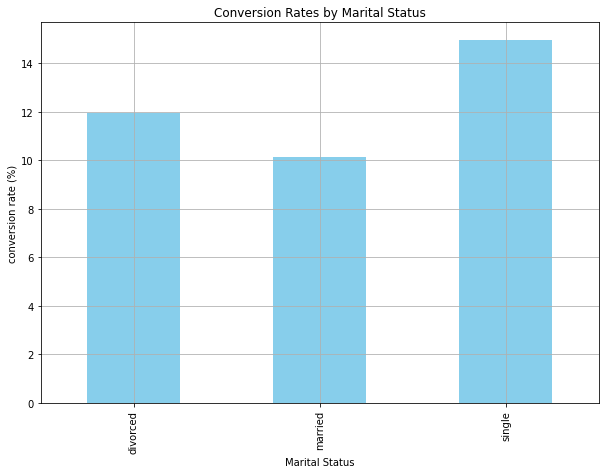

In [14]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### - Conversion Rates by Job

In [15]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

In [16]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

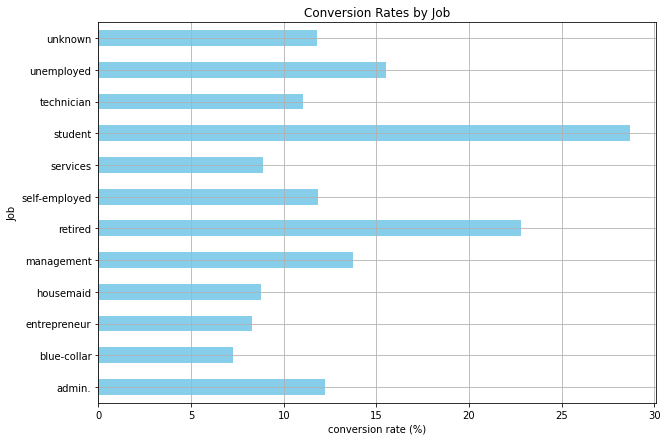

In [17]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

#### - Default Rates by Conversions

In [18]:
default_by_conversion_df = pd.pivot_table(
    df, 
    values='y', 
    index='defaulter', 
    columns='conversion', 
    aggfunc=len
)

In [19]:
default_by_conversion_df

conversion,0,1
defaulter,,
no,39159,5237
yes,763,52


In [20]:
default_by_conversion_df.columns = ['non_conversions', 'conversions']

In [21]:
default_by_conversion_df

,non_conversions,conversions
defaulter,,
no,39159,5237
yes,763,52


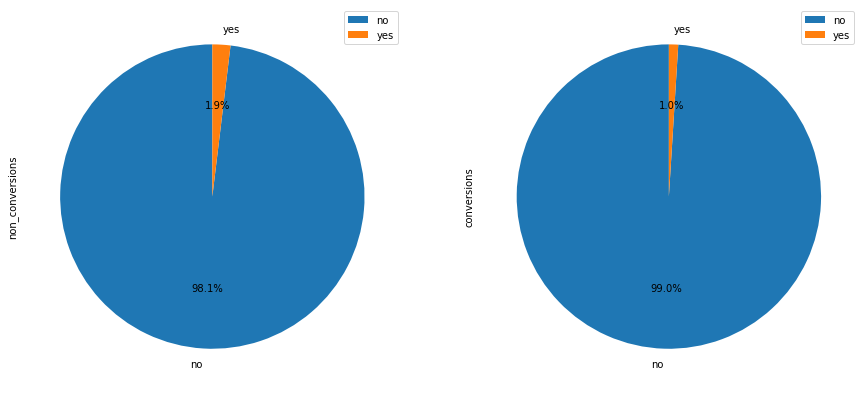

In [22]:
default_by_conversion_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

#### - Bank Balance by Conversions

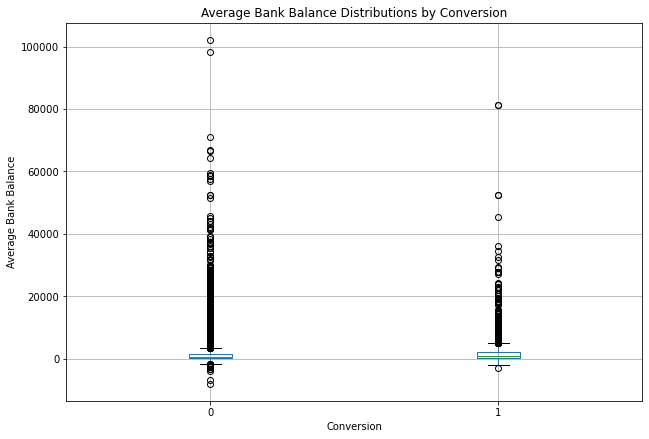

In [23]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

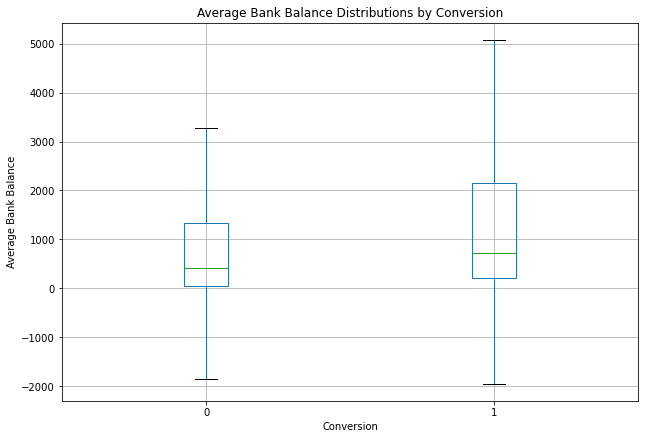

In [24]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

#### - Conversions by Number of Contacts

In [25]:
conversions_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [26]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


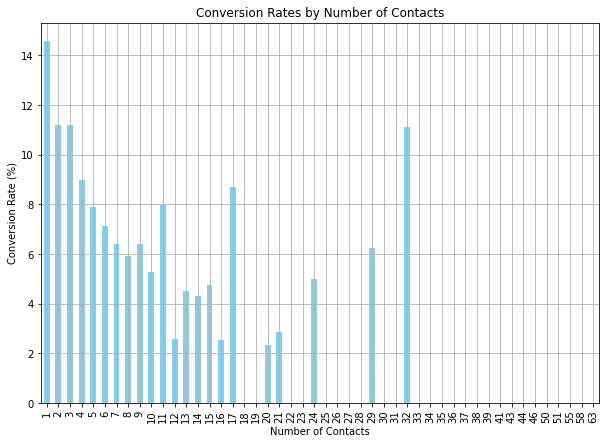

In [27]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

# 3. Encoding Categorical Variables

In [28]:
list(df.columns)

['serNo',
 'age',
 'job',
 'marital',
 'education',
 'defaulter',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

In [29]:
df.describe()

,serNo,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [32]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'defaulter',
    'housing',
    'loan',
    'contact',
    'month'
]

In [33]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
defaulter     2
housing       2
loan          2
contact       3
month        12
dtype: int64

#### - encoding 'month'

In [34]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [35]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [36]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [37]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

#### - encoding 'job'

In [38]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [39]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [40]:
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,serNo,age,job,marital,education,defaulter,balance,housing,loan,contact,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,...,0,0,1,0,0,0,0,0,0,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,...,0,0,0,0,0,0,0,1,0,0
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,1,0,0,0,0,0,0,0,0,0
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,0,0,0,0,0,0,0,0,0,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,...,0,0,0,0,0,0,0,0,0,1


#### - encoding 'marital'

In [42]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [43]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [44]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,serNo,age,job,marital,education,defaulter,balance,housing,loan,contact,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,...,0,0,0,0,0,0,0,0,1,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,...,0,0,0,0,1,0,0,0,0,1
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,0,0,0,0,0,0,0,0,1,0
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,0,0,0,0,0,0,0,0,1,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,...,0,0,0,0,0,0,1,0,0,1


#### - encoding 'housing'

In [45]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

#### - encoding 'loan'

In [47]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [48]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

# 4. Fitting Decision Trees

In [49]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [50]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [51]:
from sklearn import tree

In [52]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [53]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(max_depth=4)

In [54]:
dt_model.classes_

array([0, 1], dtype=int64)

# 5. Interpreting Decision Tree Model

In [59]:
# conda install python-graphviz

import graphviz

In [60]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 

In [61]:
graph = graphviz.Source(dot_data)

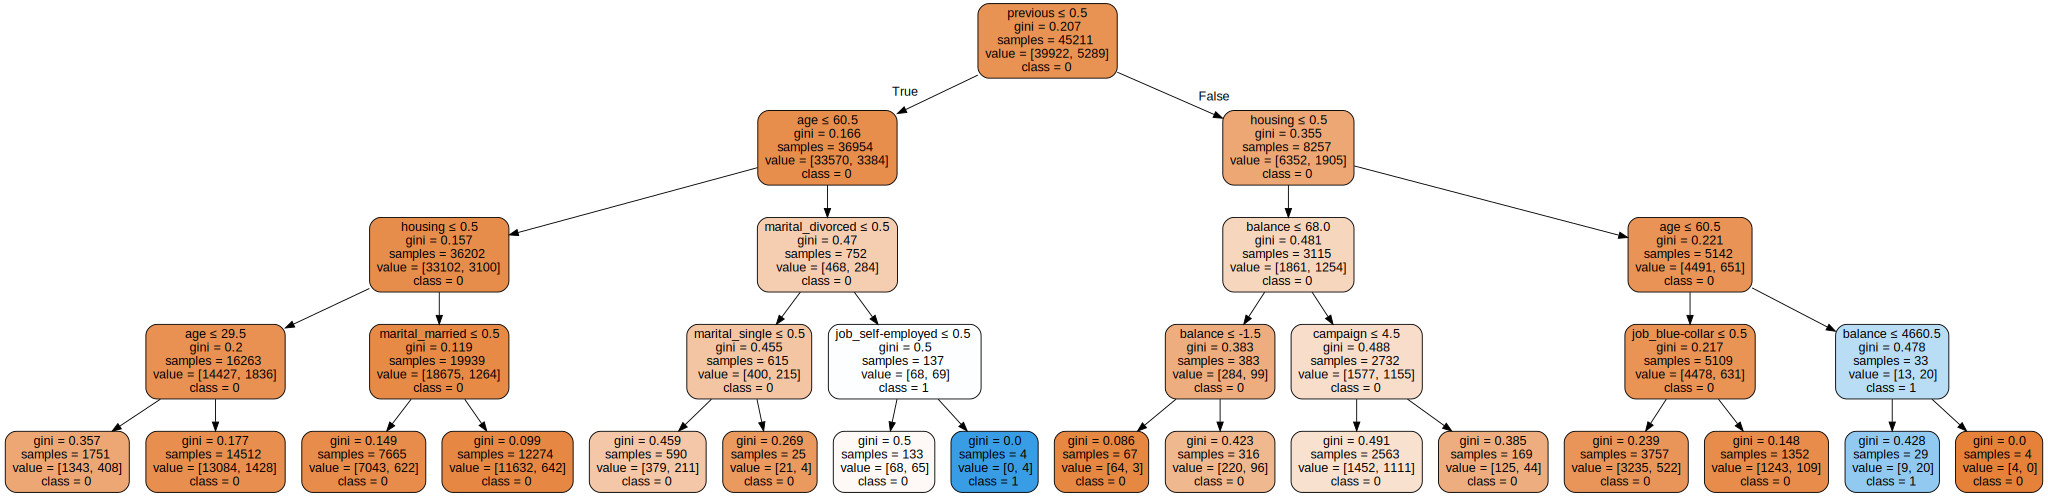

In [58]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph